In [ ]:
!pip install numpy opencv-python matplotlib

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Read the image file into a matrix with OpenCV
img_mat = cv.imread('wall_1.png', cv.IMREAD_GRAYSCALE)

# First row
print(img_mat[0])
plt.plot(img_mat[0])

In [ ]:
# Plot heatmap
plt.imshow(img_mat, cmap='hot', interpolation='nearest')

In [ ]:
# Capture webcam feed and show the frames
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Convert to grayscale
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('Webcam', frame_gray)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

Try the harder example...

<class 'numpy.ndarray'>
(596, 593)


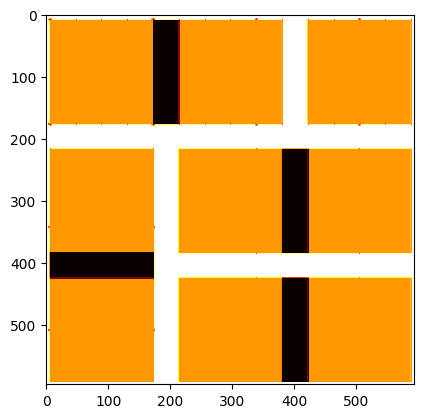

In [11]:
maze_img_mat = cv.imread("maze_test_1.png", cv.IMREAD_GRAYSCALE)
print(type(maze_img_mat))
print(maze_img_mat.shape)

plt.imshow(maze_img_mat, cmap='hot', interpolation='nearest')

In [29]:
def compute_state_midpoints(img_mat, x_num_states, y_num_states):
    img_shape = img_mat.shape
    img_height = img_shape[0]
    img_width = img_shape[1]
    print("height = ", img_height, ", width = ", img_width)

    box_size = (img_width/x_num_states, img_height/y_num_states)
    print(box_size)

    state_mid_points = []
    for i in range(x_num_states):
        for j in range(y_num_states):
            print(i, ",", j)
            mid_point = (i*box_size[0] + box_size[0]/2.0, j*box_size[1] + box_size[1]/2.0)
            print("mid_point =", f'{mid_point[0]:.2f}', f'{mid_point[1]:.2f}')
            state_mid_points.append(mid_point)
    
    return(state_mid_points)


state_mid_points = compute_state_midpoints(maze_img_mat, 3, 3)
print(state_mid_points)




height =  596 , width =  593
(197.66666666666666, 198.66666666666666)
0 , 0
mid_point = 98.83 99.33
0 , 1
mid_point = 98.83 298.00
0 , 2
mid_point = 98.83 496.67
1 , 0
mid_point = 296.50 99.33
1 , 1
mid_point = 296.50 298.00
1 , 2
mid_point = 296.50 496.67
2 , 0
mid_point = 494.17 99.33
2 , 1
mid_point = 494.17 298.00
2 , 2
mid_point = 494.17 496.67
[(98.83333333333333, 99.33333333333333), (98.83333333333333, 298.0), (98.83333333333333, 496.66666666666663), (296.5, 99.33333333333333), (296.5, 298.0), (296.5, 496.66666666666663), (494.16666666666663, 99.33333333333333), (494.16666666666663, 298.0), (494.16666666666663, 496.66666666666663)]
